In [11]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import stock_utils as su
import pylab as pl
%matplotlib inline

In [12]:
# We will look at stock prices over the past year, starting at January 1, 2016
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2017, 7, 31)
end_date = datetime.date.today()

tickers = ['AAPL', 'MSFT', 'GOOG']

In [13]:
#su.get_quandl_data(tickers, start_date, end_date)

In [14]:
data_frame = pd.read_csv(su.symbol_to_path(tickers[0]),
      index_col = 'Date',
      parse_dates = True,
      na_values = ['NaN'])
data_frame.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-09-14,158.99,159.40,158.09,158.28,23073646.0,0.0,1.0,158.99,159.40,158.09,158.28,23073646.0
2017-09-13,159.87,159.96,157.91,159.65,44393752.0,0.0,1.0,159.87,159.96,157.91,159.65,44393752.0
2017-09-12,162.61,163.96,158.77,160.82,71139119.0,0.0,1.0,162.61,163.96,158.77,160.82,71139119.0
2017-09-11,160.50,162.05,159.89,161.50,31028926.0,0.0,1.0,160.50,162.05,159.89,161.50,31028926.0
2017-09-08,160.86,161.15,158.53,158.63,28183159.0,0.0,1.0,160.86,161.15,158.53,158.63,28183159.0


In [15]:
data_frame.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1938.000000,1938.000000,1938.000000,1938.000000,1.938000e+03,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1.938000e+03
mean,297.738541,300.399267,294.700512,297.612048,2.805217e+07,0.015722,1.003096,80.679281,81.368308,79.929816,80.667515,8.808534e+07
std,183.265307,184.880802,181.313760,183.104322,1.945558e+07,0.193413,0.136293,33.729578,33.941739,33.515494,33.736651,6.070493e+07
min,90.000000,90.700000,89.470000,90.280000,5.624800e+06,0.000000,1.000000,24.722226,25.188732,24.449777,24.681102,1.147592e+07
25%,116.907500,117.989150,116.080000,117.060000,1.430990e+07,0.000000,1.000000,51.451519,52.214892,51.032202,51.689148,4.210958e+07
50%,261.055000,263.645000,258.205000,261.025000,2.232984e+07,0.000000,1.000000,75.959412,76.465648,74.876631,75.543636,7.355890e+07
75%,454.887500,457.675000,449.380000,453.000000,3.590948e+07,0.000000,1.000000,107.055953,108.070038,106.007335,107.178722,1.153254e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,164.800000,164.940000,163.630000,164.050000,4.702495e+08


## Ticker price for a single stock for the period

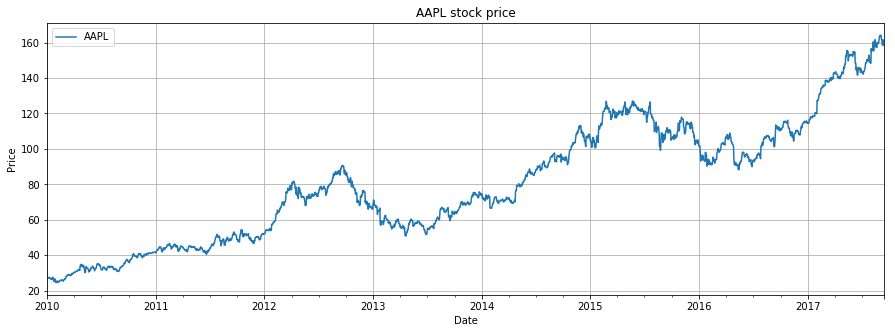

In [16]:
# start_date = '2016-01-01'
# end_date = '2016-01-31'

data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(figsize=(15,5), grid=True, title='{0} stock price'.format(tickers[0]))

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Rolling mean and Bollinger bands

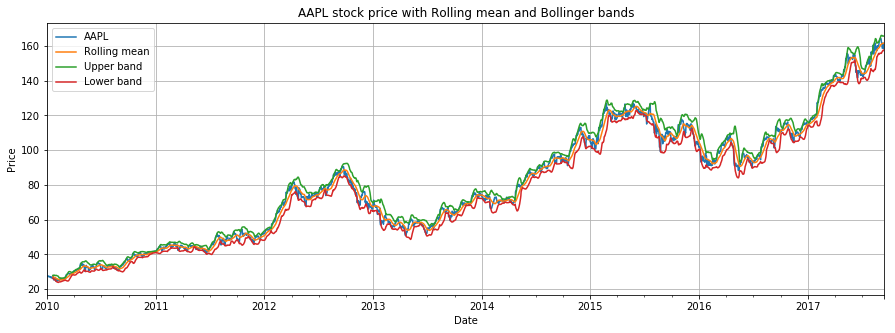

In [17]:
data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(label=tickers[0])

#Calculate rolling mean and rolling std for a period of 20 days
window_size = 20

rolling_mean = su.get_rolling_mean(data_frame, window=window_size)
rolling_std = su.get_rolling_std(data_frame, window=window_size)

#Calculate Bollinger bands
upper_band, lower_band = su.get_bollinger_bands(rolling_mean, rolling_std)

# rename the columns so they are labeled properly on the plot
upper_band = upper_band.rename(columns = {upper_band.columns[0] : 'Upper band'})
lower_band = lower_band.rename(columns = {lower_band.columns[0] : 'Lower band'})
rolling_mean = rolling_mean.rename(columns = {rolling_mean.columns[0] : 'Rolling mean'})

rolling_mean.plot(ax=ax, label='Rolling mean')
upper_band.plot(label='Upper band', ax=ax)
lower_band.plot(label='Lower band', ax=ax, figsize=(15, 5), grid=True)

ax.set_title('{0} stock price with Rolling mean and Bollinger bands'.format(tickers[0]))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Plotting prices for selected stocks

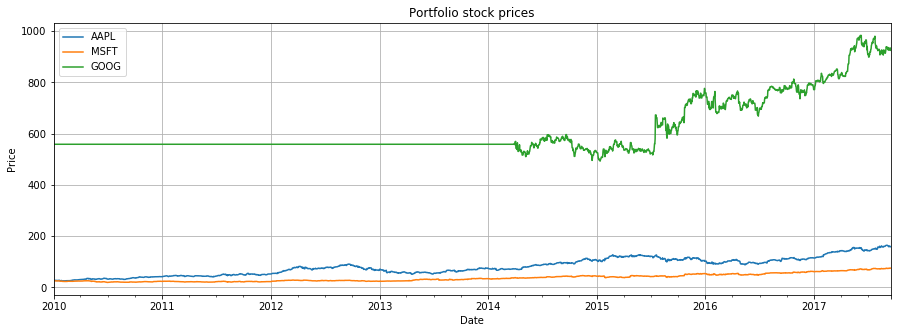

In [18]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

ax = data_frame.plot(figsize=(15,5), grid=True, title='Portfolio stock prices')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Normalized prices for selected stocks

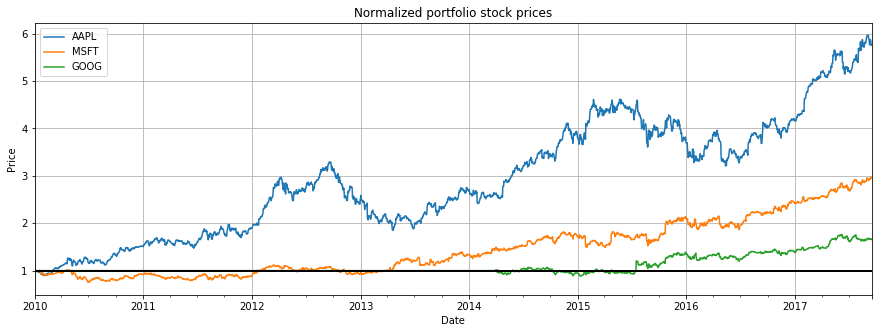

In [19]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

data_frame = su.normalize_data(data_frame)
ax = data_frame.plot(figsize=(15,5), grid=True, title='Normalized portfolio stock prices')

ax.axhline(y=1, color='black', lw=2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Daily returns for selected stocks

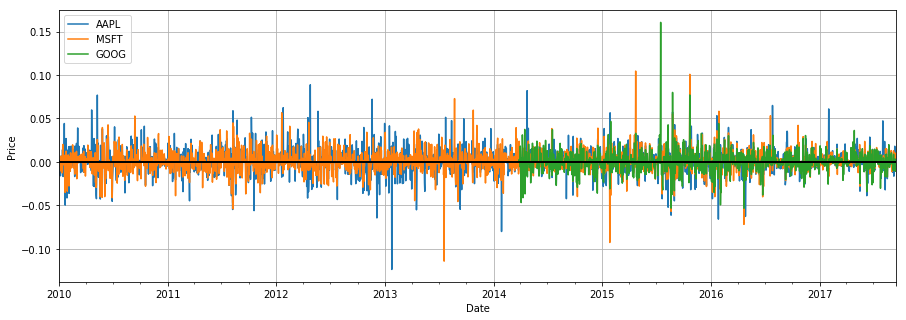

In [20]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

daily_returns = su.compute_daily_returns(data_frame)
ax = daily_returns.plot(figsize=(15,5), grid = True)

ax.axhline(y = 0, color = 'black', lw = 2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Cummulative returns (in percentage) at the end of the period for selected stocks

In [21]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)
cummulative_returns = su.compute_cummulative_returns(data_frame, data_frame.shape[0] - 1)
print(cummulative_returns.ix[-1, :])

AAPL    4.754953
MSFT    1.957582
GOOG    0.656538
Name: 2017-09-15 00:00:00, dtype: float64
